## PCA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn import decomposition
from sklearn import datasets

from sklearn.model_selection import train_test_split

np.random.seed(5)

In [ ]:
cancer_ds = datasets.load_breast_cancer(as_frame=True)

In [ ]:
X = cancer_ds.data
y = cancer_ds.target

In [ ]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


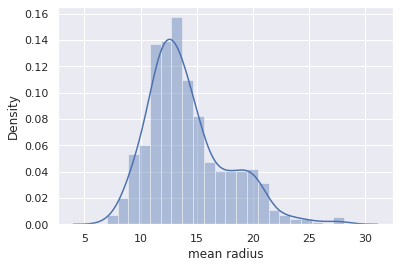

In [ ]:
sns.distplot(X['mean radius'])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
pca = decomposition.PCA(n_components=3)
pca.fit(x_train)

In [ ]:
transformed_X = pca.transform(x_train)

In [ ]:
# first 2 transformed samples
transformed_X[:2]

array([[-251.23096524,   26.01783927,  -11.45884254],
       [-422.46277164,  -29.20106383,   -2.18396595]])

In [ ]:
pca.components_.shape

(3, 30)

In [ ]:
# How much variance do these components capture?

pca.explained_variance_ratio_

array([0.98033276, 0.01803199, 0.00141101])

## Training a classifier on the transformed features

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(transformed_X, y_train)

In [ ]:
# evaluate
from sklearn.metrics import accuracy_score


x_test_transformed = pca.transform(x_test)
y_pred = clf.predict(x_test_transformed)

acc = accuracy_score(y_pred, y_test)

In [ ]:
print(acc)

0.9122807017543859
